In [2]:
import pandas as pd
from datetime import date
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
# janela = tk.Tk()
# janela.withdraw()
# janela.attributes("-topmost", True)

# caminho_do_arquivo = filedialog.askopenfilename(title="Selecione os arquivos.")
# #______________________________________________________________________________________

In [4]:
# caminho_do_arquivo

In [5]:
df = pd.read_csv('C:/Users/Flavio Henrique/OneDrive - DIAGNOSTICOS DA AMERICA S.A/Área de Trabalho/Acidente/Arquivos/acidentes2024_todas_causas_tipos.csv',encoding="ANSI",sep=";")

C:\Users\Flavio Henrique\AppData\Local\Temp\ipykernel_6164\1143934491.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Flavio Henrique/OneDrive - DIAGNOSTICOS DA AMERICA S.A/Área de Trabalho/Acidente/Arquivos/acidentes2024_todas_causas_tipos.csv',encoding="ANSI",sep=";")


Além da hipótese sobre o traçado da via, aqui estão mais três sugestões de temas impactantes e de grande interesse que você pode desenvolver com sua base de dados, cada um focado em uma área diferente:

Tema 1: Impacto das condições climáticas e da iluminação na gravidade dos acidentes
Hipótese: Acidentes que ocorrem em condições climáticas adversas (chuva, neblina) ou à noite (sem iluminação) resultam em um número maior de vítimas e danos mais graves do que os que ocorrem sob condições normais.

Por que é impactante? Este tema é crucial para a segurança pública e para a tomada de decisões em infraestrutura. Ao provar a correlação, você pode sugerir a implementação de melhores sistemas de iluminação e aprimoramento da sinalização em rodovias, além de campanhas de conscientização para motoristas sobre os riscos de dirigir sob essas condições. Sua análise poderia fornecer dados para justificar investimentos em segurança viária.

In [6]:
df.head(5)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772,1268971.0,01/01/2024,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,...,Masculino,0.0,0.0,0.0,1.0,-2.272.935.968,-4.270.112.512,SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774,1268985.0,01/01/2024,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,...,Feminino,1.0,0.0,0.0,0.0,-16.229.185,-49.009.797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774,1268985.0,01/01/2024,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,...,Feminino,1.0,0.0,0.0,0.0,-16.229.185,-49.009.797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777,1269020.0,01/01/2024,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,...,Masculino,1.0,0.0,0.0,0.0,-2.017.292.791,-4.026.736.384,SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778,1269028.0,01/01/2024,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,...,Masculino,1.0,0.0,0.0,0.0,-2.683.477,-48.706.151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC


In [7]:
colunas_essenciais = [
    'condicao_metereologica', 
    'classificacao_acidente', 
    'tipo_veiculo',
    'fase_dia',
    "uf"
]

In [8]:
df_limpo = df[colunas_essenciais].copy()

In [9]:
df_limpo

,condicao_metereologica,classificacao_acidente,tipo_veiculo,fase_dia,uf
0,Céu Claro,Com Vítimas Fatais,Motocicleta,Plena Noite,RJ
1,Céu Claro,Sem Vítimas,Automóvel,Plena Noite,GO
2,Céu Claro,Sem Vítimas,Automóvel,Plena Noite,GO
3,Nublado,Sem Vítimas,Caminhonete,Plena Noite,ES
4,Chuva,Com Vítimas Feridas,Camioneta,Plena Noite,SC
...,...,...,...,...,...
603210,Nublado,Com Vítimas Feridas,Semireboque,Pleno dia,RJ
603211,Nublado,Com Vítimas Feridas,Caminhão-trator,Pleno dia,RJ
603212,Nublado,Com Vítimas Feridas,Automóvel,Pleno dia,RJ
603213,Nublado,Com Vítimas Feridas,Automóvel,Pleno dia,RJ


In [10]:
df_limpo['classificacao_acidente'] = df_limpo['classificacao_acidente'].replace({
                                                                                    'Com Vítimas Fatais': 'Gravíssimo',
                                                                                    'Com Vítimas Feridas': 'Grave',
                                                                                    'Sem Vítimas': 'Leve'
                                                                                    
                                                                                })

In [11]:
df_limpo

,condicao_metereologica,classificacao_acidente,tipo_veiculo,fase_dia,uf
0,Céu Claro,Gravíssimo,Motocicleta,Plena Noite,RJ
1,Céu Claro,Leve,Automóvel,Plena Noite,GO
2,Céu Claro,Leve,Automóvel,Plena Noite,GO
3,Nublado,Leve,Caminhonete,Plena Noite,ES
4,Chuva,Grave,Camioneta,Plena Noite,SC
...,...,...,...,...,...
603210,Nublado,Grave,Semireboque,Pleno dia,RJ
603211,Nublado,Grave,Caminhão-trator,Pleno dia,RJ
603212,Nublado,Grave,Automóvel,Pleno dia,RJ
603213,Nublado,Grave,Automóvel,Pleno dia,RJ


In [12]:
acidentes = df_limpo.groupby(['classificacao_acidente', 'condicao_metereologica', 'uf']).size().reset_index(name='total_acidentes')

In [13]:
acidentes.sort_values("condicao_metereologica")

,classificacao_acidente,condicao_metereologica,uf,total_acidentes
0,Grave,Chuva,AC,57
202,Gravíssimo,Chuva,AC,36
203,Gravíssimo,Chuva,AL,43
204,Gravíssimo,Chuva,BA,1843
205,Gravíssimo,Chuva,CE,63
...,...,...,...,...
190,Grave,Vento,GO,53
364,Gravíssimo,Vento,GO,3
365,Gravíssimo,Vento,MG,31
188,Grave,Vento,DF,39


In [14]:
tabela_gravidade_clima = pd.crosstab(df_limpo['condicao_metereologica'], df_limpo['classificacao_acidente'], normalize='index') * 100
tabela_gravidade_clima.round(2)

classificacao_acidente,Grave,Gravíssimo,Leve
condicao_metereologica,,,
Chuva,72.95,17.43,9.62
Céu Claro,73.97,16.81,9.23
Garoa/Chuvisco,68.82,20.37,10.81
Granizo,100.00,0.00,0.00
Ignorado,66.24,22.38,11.37
Neve,100.00,0.00,0.00
Nevoeiro/Neblina,65.78,24.72,9.49
Nublado,74.99,15.26,9.75
Sol,78.91,12.21,8.88


<Figure size 1200x700 with 0 Axes>

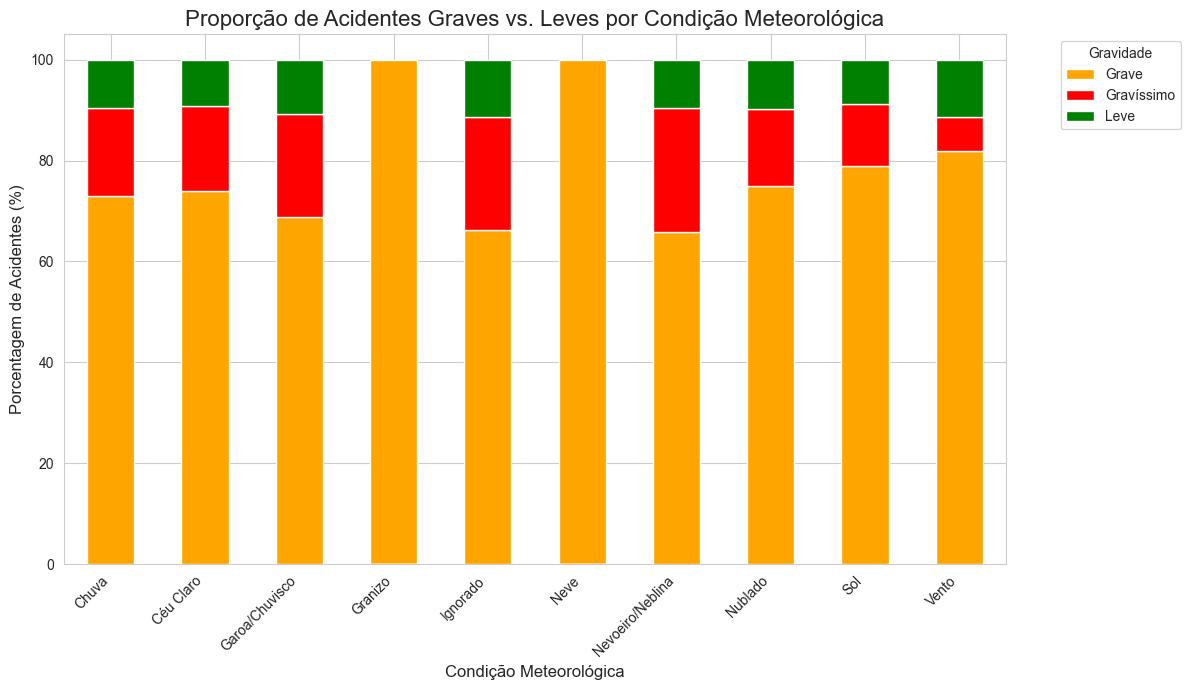

In [15]:
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

tabela_gravidade_clima.plot(kind='bar', stacked=True, figsize=(12, 7), color=['Orange', 'Red', 'Green'])
plt.title('Proporção de Acidentes Graves vs. Leves por Condição Meteorológica', fontsize=16)
plt.xlabel('Condição Meteorológica', fontsize=12)
plt.ylabel('Porcentagem de Acidentes (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gravidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Segmentação pela região centro-oeste

In [16]:
df_1 = []

df_limpo_al = df_limpo.query(' `uf` == "AL" ')

df_limpo_ba = df_limpo.query(' `uf` == "BA" ')

df_limpo_ce = df_limpo.query(' `uf` == "CE" ')

df_limpo_ma = df_limpo.query(' `uf` == "MA" ')

df_limpo_pb = df_limpo.query(' `uf` == "PB" ')

df_limpo_pe = df_limpo.query(' `uf` == "PE" ')

df_limpo_pi = df_limpo.query(' `uf` == "PI" ')

df_limpo_rn = df_limpo.query(' `uf` == "RN" ')

df_limpo_se = df_limpo.query(' `uf` == "SE" ')

df_1.append(df_limpo_al)
df_1.append(df_limpo_ba)
df_1.append(df_limpo_ce)
df_1.append(df_limpo_ma)
df_1.append(df_limpo_pb)
df_1.append(df_limpo_pe)
df_1.append(df_limpo_pi)
df_1.append(df_limpo_rn)
df_1.append(df_limpo_se)

df_limpo_nordeste = pd.concat(df_1)

In [17]:
# Exlcuindo 'Granizo', 'Ignorado', 'Neve' do df

contagem_geral = df_limpo_nordeste["condicao_metereologica"].count()
contagem = df_limpo_nordeste[df_limpo_nordeste["condicao_metereologica"].isin(["Granizo", "Ignorado", "Neve"])]
contagem = contagem["condicao_metereologica"].count()
print(f"{contagem} linhas exclusas de {contagem_geral} linhas iniciais - linhas totais: {contagem_geral - contagem}")

df_limpo_nordeste = df_limpo_nordeste[~df_limpo_nordeste['condicao_metereologica'].isin(['Granizo', 'Ignorado', 'Neve'])]

1543 linhas exclusas de 130874 linhas iniciais - linhas totais: 129331


In [18]:
acidentes_sudeste = df_limpo_nordeste.groupby(['classificacao_acidente', 'condicao_metereologica', 'uf']).size().reset_index(name='total_acidentes')

In [19]:
a = df_limpo_nordeste.groupby(['condicao_metereologica']).size().reset_index(name='total_acidentes')
a

,condicao_metereologica,total_acidentes
0,Chuva,11539
1,Céu Claro,92319
2,Garoa/Chuvisco,2984
3,Nevoeiro/Neblina,477
4,Nublado,13528
5,Sol,8302
6,Vento,182


In [20]:
tabela_gravidade_clima_sudeste = pd.crosstab(df_limpo_nordeste['condicao_metereologica'], df_limpo_nordeste['classificacao_acidente'], normalize='index') * 100
tabela_gravidade_clima_sudeste.round(2)

classificacao_acidente,Grave,Gravíssimo,Leve
condicao_metereologica,,,
Chuva,67.28,25.09,7.63
Céu Claro,71.56,19.08,9.36
Garoa/Chuvisco,77.92,10.25,11.83
Nevoeiro/Neblina,68.13,22.01,9.85
Nublado,70.82,17.46,11.72
Sol,80.61,10.88,8.52
Vento,91.76,3.85,4.40


## Entendendo a proporção de acidentes (Gravíssimo / Graves /  Leves) por Condição Meteorológica

<Figure size 1200x700 with 0 Axes>

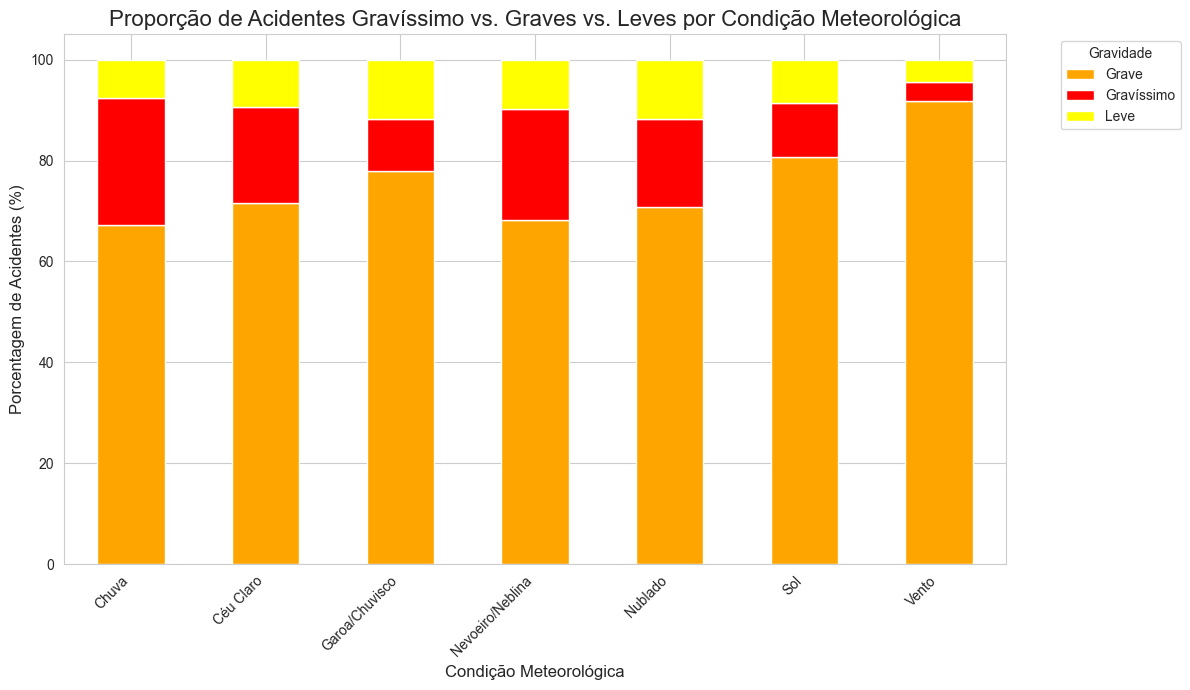

In [21]:
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

tabela_gravidade_clima_sudeste.plot(kind='bar', stacked=True, figsize=(12, 7), color=['Orange', 'Red', 'Yellow'])
plt.title('Proporção de Acidentes Gravíssimo vs. Graves vs. Leves por Condição Meteorológica', fontsize=16)
plt.xlabel('Condição Meteorológica', fontsize=12)
plt.ylabel('Porcentagem de Acidentes (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gravidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Entendendo a proporção de acidentes (Gravíssimo / Graves /  Leves) por Fase do Dia

In [22]:
df_limpo_nordeste.head()

,condicao_metereologica,classificacao_acidente,tipo_veiculo,fase_dia,uf
484,Nublado,Gravíssimo,Automóvel,Pleno dia,AL
485,Nublado,Gravíssimo,Automóvel,Pleno dia,AL
1092,Céu Claro,Grave,Automóvel,Anoitecer,AL
1093,Céu Claro,Grave,Motocicleta,Anoitecer,AL
1671,Céu Claro,Grave,Automóvel,Plena Noite,AL


In [23]:
fase_dia_gravidade = pd.crosstab(df_limpo_nordeste['fase_dia'], df_limpo_nordeste['classificacao_acidente'], normalize='index') * 100
fase_dia_gravidade.round(2)

classificacao_acidente,Grave,Gravíssimo,Leve
fase_dia,,,
Amanhecer,56.05,27.13,16.82
Anoitecer,68.38,23.38,8.23
Plena Noite,66.43,24.65,8.92
Pleno dia,77.37,13.21,9.42


<Figure size 1200x700 with 0 Axes>

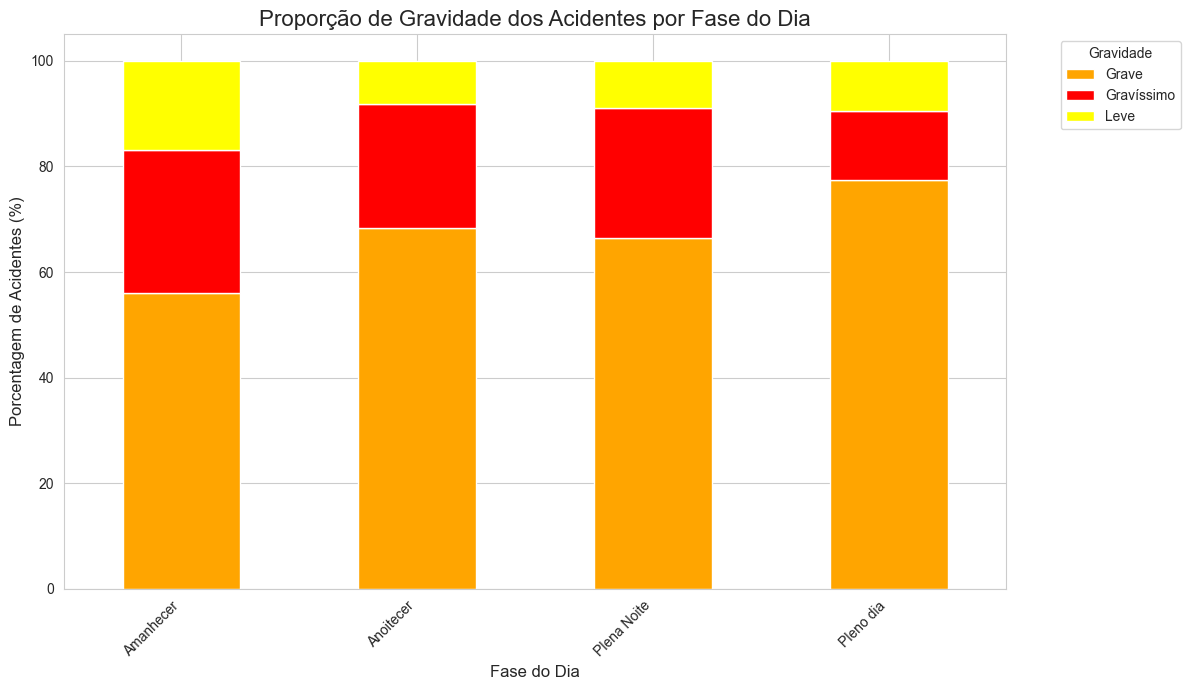

In [24]:
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

fase_dia_gravidade.plot(kind='bar', stacked=True, figsize=(12, 7), color=['Orange', 'red', 'Yellow'])
plt.title('Proporção de Gravidade dos Acidentes por Fase do Dia', fontsize=16)
plt.xlabel('Fase do Dia', fontsize=12)
plt.ylabel('Porcentagem de Acidentes (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gravidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Em primeiras analises já podemos notar que a visibilidade pode impctar nos númuros e gravidade dos acidentes.

## Como mostrado no gráfico acima os acidentes com gravidades mais expressivas acontecem no amanhecer e na plena noite, onde a visibilidade está bem reduzida. 

## Relacionando variáveis - Cenários de Risco

In [25]:

def tratar_fase_dia(row):
    condicao = row['condicao_metereologica']
    fase = row['fase_dia']
    

    if condicao in ['Sol', 'Céu Claro'] and fase in ['Plena Noite', 'Anoitecer']:
        return 'Pleno dia'
 
    else:
        return fase

df_limpo_nordeste['fase_dia_tratada'] = df_limpo_nordeste.apply(tratar_fase_dia, axis=1)

df_limpo_nordeste['cenario_de_risco_tratado'] = df_limpo_nordeste['condicao_metereologica'] + ' - ' + df_limpo_nordeste['fase_dia_tratada']


In [26]:
proporcao_por_cenario = df_limpo_nordeste.groupby('cenario_de_risco_tratado')['classificacao_acidente'].value_counts().unstack()
proporcao_por_cenario

classificacao_acidente,Grave,Gravíssimo,Leve
cenario_de_risco_tratado,,,
Chuva - Amanhecer,219.0,82.0,40.0
Chuva - Anoitecer,439.0,374.0,61.0
Chuva - Plena Noite,2944.0,1736.0,359.0
Chuva - Pleno dia,4162.0,703.0,420.0
Céu Claro - Amanhecer,1906.0,944.0,578.0
Céu Claro - Pleno dia,64159.0,16670.0,8062.0
Garoa/Chuvisco - Amanhecer,164.0,51.0,3.0
Garoa/Chuvisco - Anoitecer,148.0,18.0,10.0
Garoa/Chuvisco - Plena Noite,908.0,162.0,171.0


In [27]:
proporcao_por_cenario = df_limpo_nordeste.groupby('cenario_de_risco_tratado')['classificacao_acidente'].value_counts(normalize=True).unstack() * 100
proporcao_por_cenario =proporcao_por_cenario.dropna()
proporcao_por_cenario.round(2)

classificacao_acidente,Grave,Gravíssimo,Leve
cenario_de_risco_tratado,,,
Chuva - Amanhecer,64.22,24.05,11.73
Chuva - Anoitecer,50.23,42.79,6.98
Chuva - Plena Noite,58.42,34.45,7.12
Chuva - Pleno dia,78.75,13.30,7.95
Céu Claro - Amanhecer,55.60,27.54,16.86
Céu Claro - Pleno dia,72.18,18.75,9.07
Garoa/Chuvisco - Amanhecer,75.23,23.39,1.38
Garoa/Chuvisco - Anoitecer,84.09,10.23,5.68
Garoa/Chuvisco - Plena Noite,73.17,13.05,13.78


In [28]:
proporcao_gravissimo = proporcao_por_cenario.sort_values(by='Gravíssimo', ascending=False)

In [29]:
proporcao_grave = proporcao_por_cenario.sort_values(by='Grave', ascending=False)

C:\Users\Flavio Henrique\AppData\Local\Temp\ipykernel_6164\4066371717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cenarios.index, y=top_5_cenarios.values, palette='viridis')


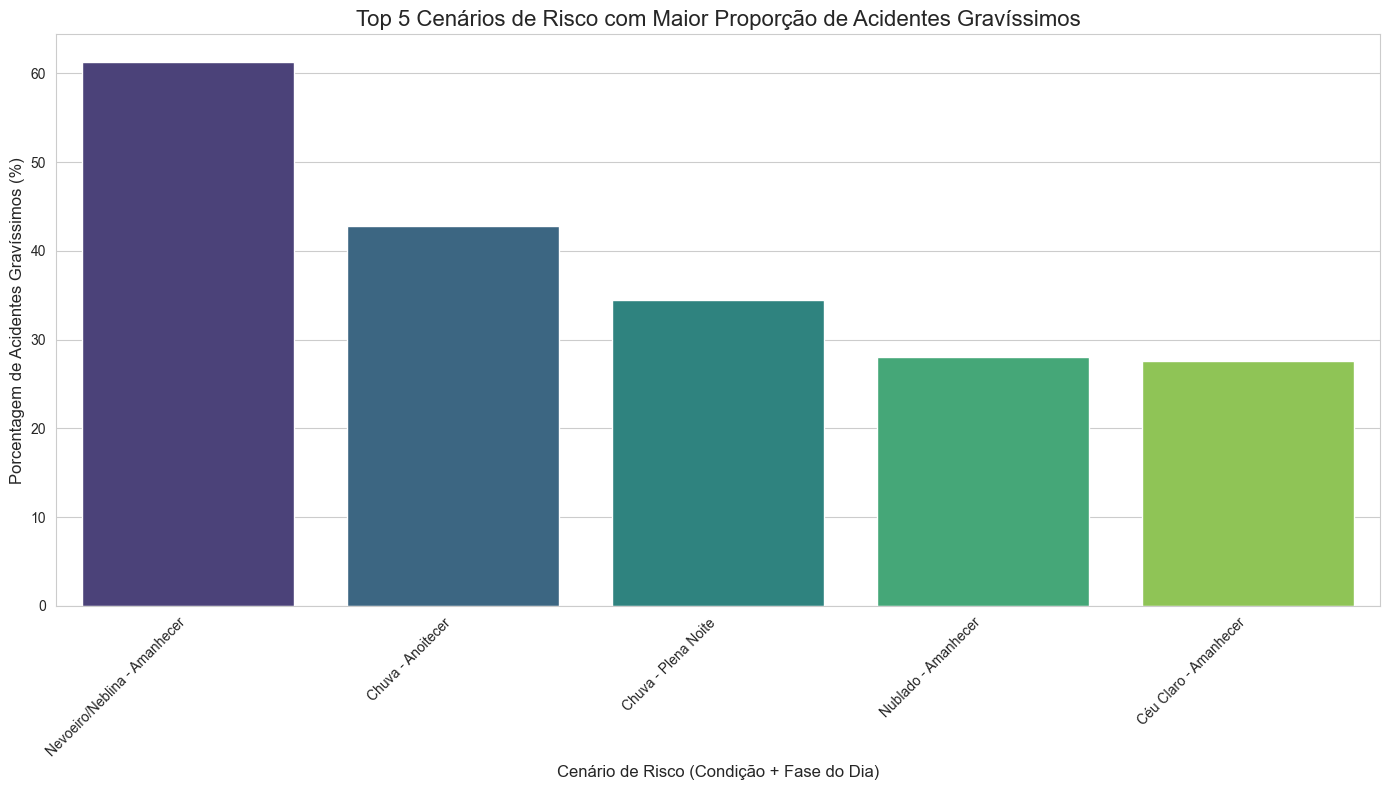

In [30]:
plt.figure(figsize=(14, 8))
top_5_cenarios = proporcao_gravissimo.head(5)['Gravíssimo']
sns.barplot(x=top_5_cenarios.index, y=top_5_cenarios.values, palette='viridis')
plt.title('Top 5 Cenários de Risco com Maior Proporção de Acidentes Gravíssimos', fontsize=16)
plt.xlabel('Cenário de Risco (Condição + Fase do Dia)', fontsize=12)
plt.ylabel('Porcentagem de Acidentes Gravíssimos (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Flavio Henrique\AppData\Local\Temp\ipykernel_6164\3063151561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cenarios.index, y=top_5_cenarios.values, palette='viridis')


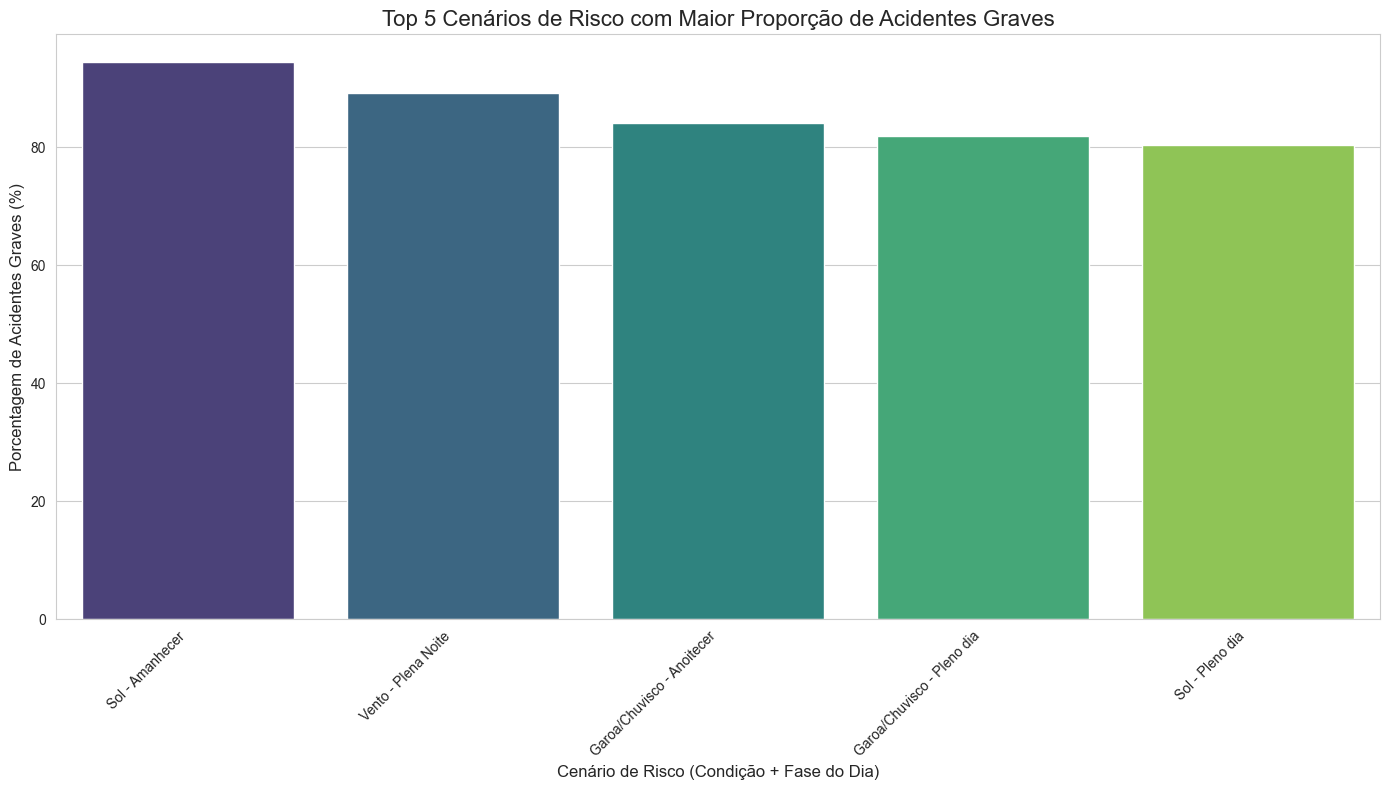

In [31]:
plt.figure(figsize=(14, 8))
top_5_cenarios = proporcao_grave.head(5)['Grave']
sns.barplot(x=top_5_cenarios.index, y=top_5_cenarios.values, palette='viridis')
plt.title('Top 5 Cenários de Risco com Maior Proporção de Acidentes Graves', fontsize=16)
plt.xlabel('Cenário de Risco (Condição + Fase do Dia)', fontsize=12)
plt.ylabel('Porcentagem de Acidentes Graves (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
df_limpo_nordeste

,condicao_metereologica,classificacao_acidente,tipo_veiculo,fase_dia,uf,fase_dia_tratada,cenario_de_risco_tratado
484,Nublado,Gravíssimo,Automóvel,Pleno dia,AL,Pleno dia,Nublado - Pleno dia
485,Nublado,Gravíssimo,Automóvel,Pleno dia,AL,Pleno dia,Nublado - Pleno dia
1092,Céu Claro,Grave,Automóvel,Anoitecer,AL,Pleno dia,Céu Claro - Pleno dia
1093,Céu Claro,Grave,Motocicleta,Anoitecer,AL,Pleno dia,Céu Claro - Pleno dia
1671,Céu Claro,Grave,Automóvel,Plena Noite,AL,Pleno dia,Céu Claro - Pleno dia
...,...,...,...,...,...,...,...
598478,Céu Claro,Leve,Caminhão,Anoitecer,SE,Pleno dia,Céu Claro - Pleno dia
599470,Nublado,Grave,Motocicleta,Plena Noite,SE,Plena Noite,Nublado - Plena Noite
599471,Nublado,Grave,NaN,Plena Noite,SE,Plena Noite,Nublado - Plena Noite
599472,Nublado,Grave,Motocicleta,Plena Noite,SE,Plena Noite,Nublado - Plena Noite


In [33]:
# Preparando as tabelas de contingência para os testes
# Teste 1: Condição Meteorológica vs. Gravidade
tabela_clima = pd.crosstab(df_limpo_nordeste['condicao_metereologica'], df_limpo_nordeste['classificacao_acidente'])

# Teste 2: Fase do Dia vs. Gravidade
tabela_fase = pd.crosstab(df_limpo_nordeste['fase_dia_tratada'], df_limpo_nordeste['classificacao_acidente'])

In [34]:
tabela_clima

classificacao_acidente,Grave,Gravíssimo,Leve
condicao_metereologica,,,
Chuva,7764,2895,880
Céu Claro,66065,17614,8640
Garoa/Chuvisco,2325,306,353
Nevoeiro/Neblina,325,105,47
Nublado,9580,2362,1586
Sol,6692,903,707
Vento,167,7,8


In [35]:
tabela_fase

classificacao_acidente,Grave,Gravíssimo,Leve
fase_dia_tratada,,,
Amanhecer,2826,1368,848
Anoitecer,1210,511,171
Plena Noite,8313,3075,1155
Pleno dia,80569,19238,10047


In [36]:
# Executando o Teste de Qui-quadrado
# Teste 1
chi2_clima, p_valor_clima, _, _ = chi2_contingency(tabela_clima)
print(f"Teste de Qui-quadrado para Condição Meteorológica e Gravidade:")
print(f"Valor do Qui-quadrado: {chi2_clima:.2f}")
print(f"Valor-p: {p_valor_clima}")

Teste de Qui-quadrado para Condição Meteorológica e Gravidade:
Valor do Qui-quadrado: 977.09
Valor-p: 1.578822400639579e-201


-

In [37]:
# Teste 2
chi2_fase, p_valor_fase, _, _ = chi2_contingency(tabela_fase)
print("\nTeste de Qui-quadrado para Fase do Dia e Gravidade:")
print(f"Valor do Qui-quadrado: {chi2_fase:.2f}")
print(f"Valor-p: {p_valor_fase}")


Teste de Qui-quadrado para Fase do Dia e Gravidade:
Valor do Qui-quadrado: 1152.61
Valor-p: 8.642002921067858e-246


- Teste de Qui-quadrado para Condição Meteorológica e Gravidade:
- Valor do Qui-quadrado: 977.09
- Valor-p: 1.578822400639579e-201
_________________________________________________________________

- Teste de Qui-quadrado para Fase do Dia e Gravidade:
- Valor do Qui-quadrado: 1152.61
- Valor-p: 8.642002921067858e-246

In [38]:
df_limpo_nordeste

,condicao_metereologica,classificacao_acidente,tipo_veiculo,fase_dia,uf,fase_dia_tratada,cenario_de_risco_tratado
484,Nublado,Gravíssimo,Automóvel,Pleno dia,AL,Pleno dia,Nublado - Pleno dia
485,Nublado,Gravíssimo,Automóvel,Pleno dia,AL,Pleno dia,Nublado - Pleno dia
1092,Céu Claro,Grave,Automóvel,Anoitecer,AL,Pleno dia,Céu Claro - Pleno dia
1093,Céu Claro,Grave,Motocicleta,Anoitecer,AL,Pleno dia,Céu Claro - Pleno dia
1671,Céu Claro,Grave,Automóvel,Plena Noite,AL,Pleno dia,Céu Claro - Pleno dia
...,...,...,...,...,...,...,...
598478,Céu Claro,Leve,Caminhão,Anoitecer,SE,Pleno dia,Céu Claro - Pleno dia
599470,Nublado,Grave,Motocicleta,Plena Noite,SE,Plena Noite,Nublado - Plena Noite
599471,Nublado,Grave,NaN,Plena Noite,SE,Plena Noite,Nublado - Plena Noite
599472,Nublado,Grave,Motocicleta,Plena Noite,SE,Plena Noite,Nublado - Plena Noite


-

## Esses resultados validam as observações visuais feitas nos gráficos. podemos afirmar com confiança que a condição meteorológica e a fase do dia (iluminação) não são fatores aleatórios na ocorrência de acidentes graves. Pelo contrário, eles têm uma influência estatisticamente comprovada na gravidade dos acidentes.